In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the CSV file
file_path = 'cs_students.csv'
data = pd.read_csv(file_path)

# Dropping columns that are not necessary for the model (Student ID and Name)
data = data.drop(columns=["Student ID", "Name"])

# One-hot encode the categorical columns: Gender, Major, Interested Domain, Projects, Future Career
categorical_columns = ["Gender", "Major", "Interested Domain", "Projects", "Future Career", "Python", "SQL", "Java"]
encoder = OneHotEncoder(sparse_output=False)  # Updated to sparse_output=False
encoded_data = encoder.fit_transform(data[categorical_columns])

# Combine the encoded categorical data with numerical columns Age and GPA
numerical_columns = ["Age", "GPA"]
scaled_numerical_data = MinMaxScaler().fit_transform(data[numerical_columns])

# Combining numerical and encoded categorical data into one dataset
X = pd.concat([pd.DataFrame(scaled_numerical_data, columns=numerical_columns), 
               pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())], axis=1)

# The target variable is 'Future Career' (we need to get its encoded column)
target_column_index = list(encoder.get_feature_names_out()).index('Future Career_Information Security Analyst')
y = encoded_data[:, target_column_index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Model Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Model Accuracy: 1.0
Confusion Matrix:
[[34  0]
 [ 0  2]]


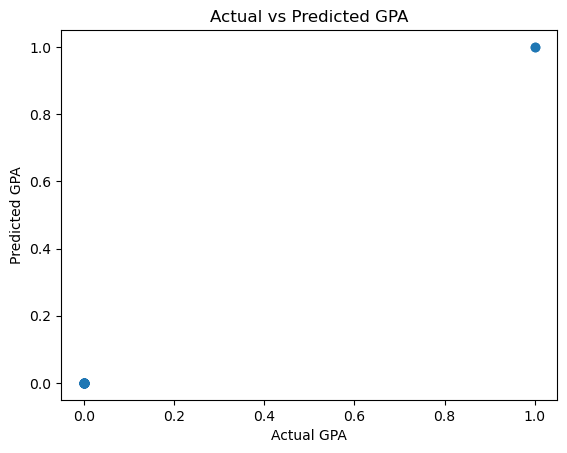

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted GPA
plt.scatter(y_test, y_pred)
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.show()


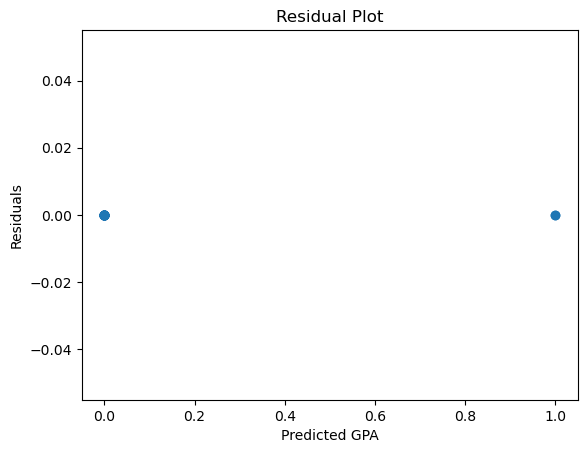

In [10]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
